### Imports

In [29]:
import os 
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report


# Read in Data

In [30]:

PATH = os.path.abspath(os.path.join(os.path.dirname("."), "Data"))
FINAL_DATA = os.path.join(PATH, "Sample_Size_1661.csv")

FINAL_DATA

'/Users/wrangamujadidi/Desktop/Capstone/capstone_opioid/Data/Sample_Size_1661.csv'

In [31]:
#insert the data into a DataFrame

data = pd.read_csv(FINAL_DATA)

In [32]:
#make sure the data loaded properly 

data.head()

,HexagonNumber,HexandMonth,Month,Under20,20to29,30to39,40to49,50to59,60to69,70andabove,...,MiscCals,OverdoseCalls,PropertyCalls,QOLCalls,TrafficCalls,ViolentCalls,AverageTemperature,AverageHumidity,AveragePrecipitation,Unemployment
0,32,32-1,1,0,0,1,1,0,0,0,...,21,2,23,71,47,18,37.4075,0.541429,0.00025,0.071667
1,33,33-1,1,0,0,0,2,0,0,0,...,30,2,23,83,35,29,37.4075,0.541429,0.00025,0.255000
2,35,35-1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.139500
3,36,36-1,1,0,0,0,0,0,0,0,...,3,0,3,10,4,4,37.4075,0.541429,0.00025,0.192000
4,43,43-1,1,0,0,0,0,0,0,1,...,25,0,40,76,44,3,37.4075,0.541429,0.00025,0.078750


In [33]:
#Drop the columns for HexandMonth and TotalNarcan.  HEXandMonth is not needed and TotalNarcan may cause bias because
#the Narcan Administered already accounts for the TotalNarcan for the month. 

data = data.drop(['HexandMonth'], axis=1)
data = data.drop(['TotalNarcan'], axis=1)

In [34]:
data.columns

Index(['HexagonNumber', 'Month', 'Under20', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70andabove', 'NarcanAdministered', 'Male',
       'Female', 'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls', 'AverageTemperature', 'AverageHumidity',
       'AveragePrecipitation', 'Unemployment'],
      dtype='object')

# Seperate the data into the features and the target

In [36]:
#load in the columns as features.  Deleted the HexagonNumber, ages, gender, weather and unemployment 
#because they were causing the model to be predictive and give us perfect scores 

features = data [[
'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls'
]]

X = features

y = data['NarcanAdministered']

print(X.shape)
print(y.shape)

(3322, 9)
(3322,)


In [37]:
list(features)

['MPDCalls',
 'FEMSCalls',
 'MedicalCalls',
 'MiscCals',
 'OverdoseCalls',
 'PropertyCalls',
 'QOLCalls',
 'TrafficCalls',
 'ViolentCalls']

### Creating the test/train split

In [38]:
#Create the test and train splits (80/20)

from sklearn.model_selection import train_test_split as tts 
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2657, 9), (665, 9), (2657,), (665,))

# Decision Tree Classifier

In [40]:
# Import the model form 
from sklearn.tree import DecisionTreeClassifier 

# Fit the Model
model = DecisionTreeClassifier() 
model.fit(X_test, y_test)

# Predict and report 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.99      0.83      0.91       332
          1       0.86      0.99      0.92       333

avg / total       0.92      0.91      0.91       665



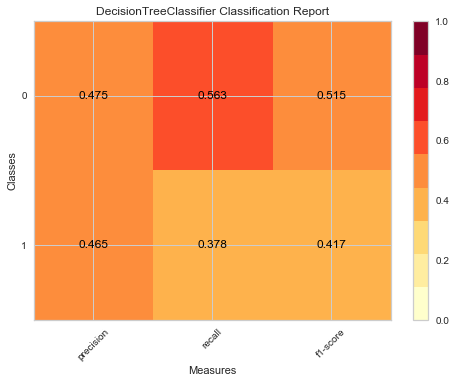

In [43]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [44]:
# Import the model form 
from sklearn.tree import DecisionTreeClassifier 

# Fit the Model
model = DecisionTreeClassifier(max_depth=10) 
model.fit(X_test, y_test)

# Predict and report 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.98      0.20      0.33       332
          1       0.55      1.00      0.71       333

avg / total       0.77      0.60      0.52       665



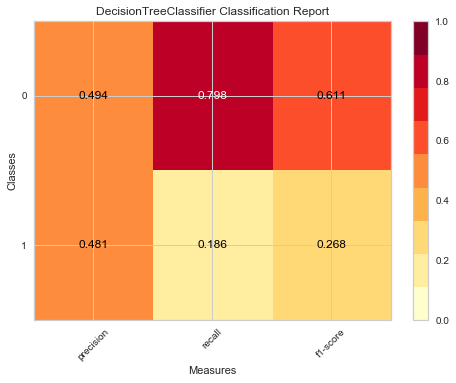

In [45]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model)


visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()           # Draw/show/poof the data

# Regularization

## Lasso

In [46]:

"""Perform Regularization Techniques for feature selection"""

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectFromModel

model = Lasso(alpha=0.2)
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('MPDCalls', 0.0), ('FEMSCalls', 0.0), ('MedicalCalls', 0.0), ('MiscCals', -7.589328925671224e-05), ('OverdoseCalls', 0.0), ('PropertyCalls', 0.0), ('QOLCalls', 0.00011009670190725226), ('TrafficCalls', 0.0), ('ViolentCalls', 0.0)]


In [47]:
model = Lasso(alpha=0.05)
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X[sfm.get_support(indices=True)]))

['MiscCals', 'QOLCalls']


## Ridge

In [48]:
model = Ridge()
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('MPDCalls', 0.0018351149477042047), ('FEMSCalls', 0.0016206818768017353), ('MedicalCalls', -0.002372552102557157), ('MiscCals', -0.0022771022605654868), ('OverdoseCalls', 0.01171957627751495), ('PropertyCalls', -0.0019060867640167973), ('QOLCalls', -0.0017080383521808232), ('TrafficCalls', 0.0003485047521026978), ('ViolentCalls', 0.000627836248260684)]


In [49]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X[sfm.get_support(indices=True)]))

['OverdoseCalls']


## Elastic Net

In [50]:
model = ElasticNet(l1_ratio=0.10)
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('MPDCalls', -0.0), ('FEMSCalls', 0.0), ('MedicalCalls', -0.0), ('MiscCals', -0.0002689545418829855), ('OverdoseCalls', 0.0), ('PropertyCalls', -0.0), ('QOLCalls', 0.00021997197469904295), ('TrafficCalls', 0.0), ('ViolentCalls', 0.0)]


In [51]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X[sfm.get_support(indices=True)]))

['MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals', 'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls', 'ViolentCalls']


# Scores using the regularized data 

In [52]:
features = data [[
   'Month', 'OverdoseCalls', 'PropertyCalls'
]]

X = features

y = data['NarcanAdministered']

print(X.shape)
print(y.shape)

(3322, 3)
(3322,)


In [53]:
# Fit the Model
model = DecisionTreeClassifier() 
model.fit(X_test, y_test)

# Predict and report 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.83      0.91       332
          1       0.86      0.99      0.92       333

avg / total       0.92      0.91      0.91       665



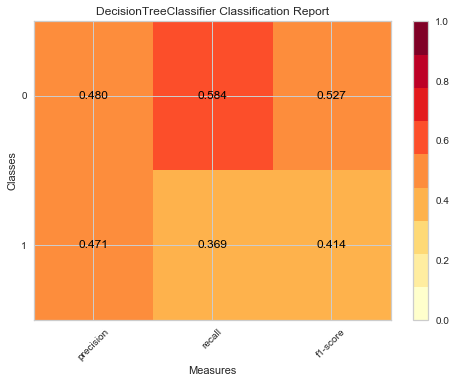

In [55]:
visualizer = ClassificationReport(model)


visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()           # Draw/show/poof the data

# Make Predictions 

## Method 1

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.467669172932
[[189 143]
 [211 122]]
             precision    recall  f1-score   support

          0       0.47      0.57      0.52       332
          1       0.46      0.37      0.41       333

avg / total       0.47      0.47      0.46       665



## Method 2

In [57]:

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


# method 1
acc= clf.score(X_test, y_test)

# method 2
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
acc = accuracy_score(pred, y_test)

print (acc)

0.475187969925


## Method 3

In [58]:
clf2 = tree.DecisionTreeClassifier(min_samples_split=2)
clf2 = clf2.fit(X_train, y_train)

clf50 = tree.DecisionTreeClassifier(min_samples_split=50)
clf50 = clf50.fit(X_train, y_train)
#clf50 = classify(features_train, labels_train, min_samples_split=50)
#clf = tree.DecisionTreeClassifier(min_samples_split=50).fit(features_train, labels_train)

acc_min_samples_split_2 = clf2.score(X_test, y_test)
acc_min_samples_split_50 = clf50.score(X_test, y_test)

In [60]:
acc_min_samples_split_2 


0.47518796992481205

In [61]:
acc_min_samples_split_50

0.47368421052631576